In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('C:\\Users\Pro\Downloads\Wholesale customers data (1).csv')

# Objective & Getting Started
In this project, we will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

# a)	Data Exploration:
1)	Display statistical information using describe method


In [2]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
data.sample(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
229,1,1,8656,2746,2501,6845,694,980
19,1,3,7780,2495,9464,669,2518,501
172,1,3,955,5479,6536,333,2840,707
294,1,2,21273,2013,6550,909,811,1854
411,1,3,2126,3289,3281,1535,235,4365
102,2,3,2932,6459,7677,2561,4573,1386
220,1,1,14755,899,1382,1765,56,749
413,1,3,4983,4859,6633,17866,912,2435
438,1,3,10290,1981,2232,1038,168,2125
369,1,3,6211,337,683,1089,41,296


In [4]:
data.drop(['Channel', 'Region'], axis=1, inplace=True)

In [5]:
data.loc[data['Fresh']<1000].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
35,688,5491,11091,833,4239,436
43,630,11095,23998,787,9529,72
53,491,10473,11532,744,5611,224
65,85,20959,45828,36,24231,1423
66,9,1534,7417,175,3468,27


In [6]:
data.iloc[:,:3].sample(6)

,Fresh,Milk,Grocery
407,7362,12844,18683
370,39679,3944,4955
330,9790,1786,5109
21,5567,871,2010
153,3463,9250,2368
145,22039,8384,34792


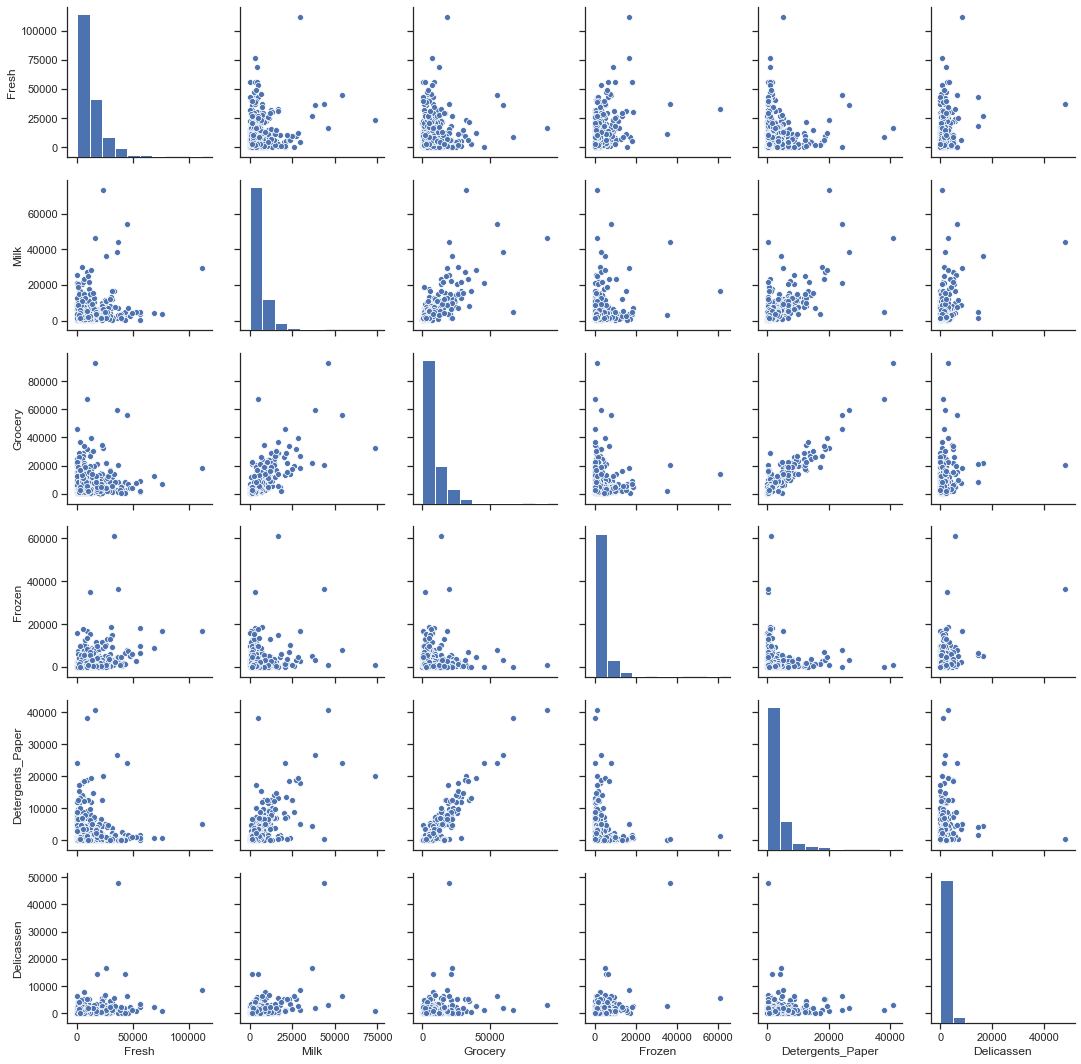

In [7]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
sns.pairplot(data)

In [8]:
column_names=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
meandata=[data[column_names].mean()]
meandata

[Fresh               12000.297727
 Milk                 5796.265909
 Grocery              7951.277273
 Frozen               3071.931818
 Detergents_Paper     2881.493182
 Delicassen           1524.870455
 dtype: float64]

In [9]:
print("0th percentile of Data : ", 
       np.percentile(data, 0, axis=0)) 
print("25th percentile of Data : ", 
       np.percentile(data, 25, axis=0)) 
print("50th percentile of Data : ",  
       np.percentile(data, 50, axis=0)) 
print("75th percentile of Data : ", 
       np.percentile(data, 75, axis=0)) 
print("100th percentile of Data : ", 
       np.percentile(data, 100, axis=0)) 

0th percentile of Data :  [ 3. 55.  3. 25.  3.  3.]
25th percentile of Data :  [3127.75 1533.   2153.    742.25  256.75  408.25]
50th percentile of Data :  [8504.  3627.  4755.5 1526.   816.5  965.5]
75th percentile of Data :  [16933.75  7190.25 10655.75  3554.25  3922.    1820.25]
100th percentile of Data :  [112151.  73498.  92780.  60869.  40827.  47943.]


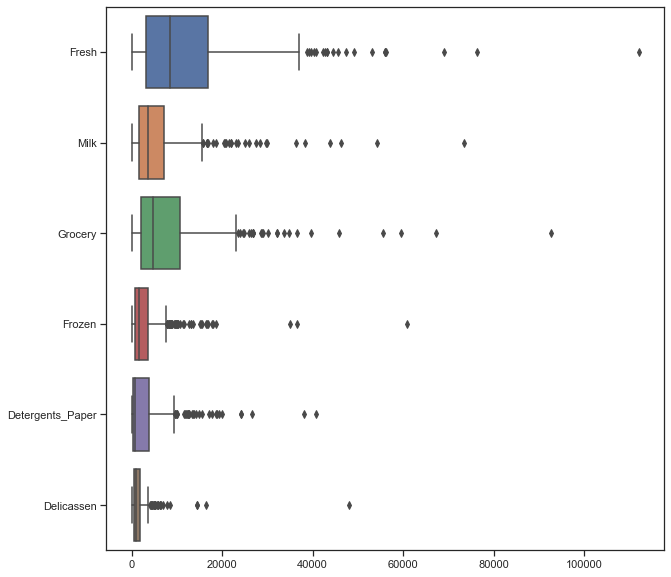

In [10]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, orient="h")


***Observation*** : from the box plot above we can see that there are plenty of outliers in the data or points that are not included in the box i.e no where near the quartiles.

# Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.
What kind of establishment (customer) could each of the five samples you've chosen represent?
Hint: Implementation: Feature Relevance using R^2


In [11]:
from sklearn.metrics import r2_score
r2_score(data['Fresh'],data["Milk"])  
r2_score(data['Fresh'],data["Grocery"])

-0.6851395140378538

In [12]:
data.corr()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


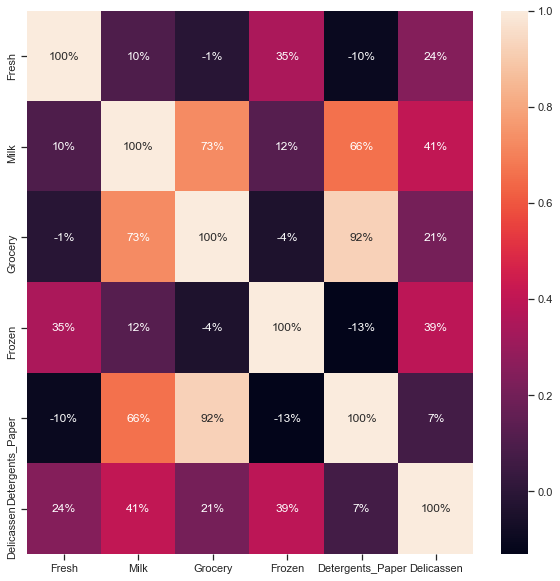

In [13]:

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.0%')

In [14]:
#plt.figure(figsize=(10,10))
#sns.heatmap(data_scaled.corr(), annot=True, fmt='.0%')

# Question 2
Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?
Hint : Visualize Feature Distributions using scatter matrix and create  correlation matrix 


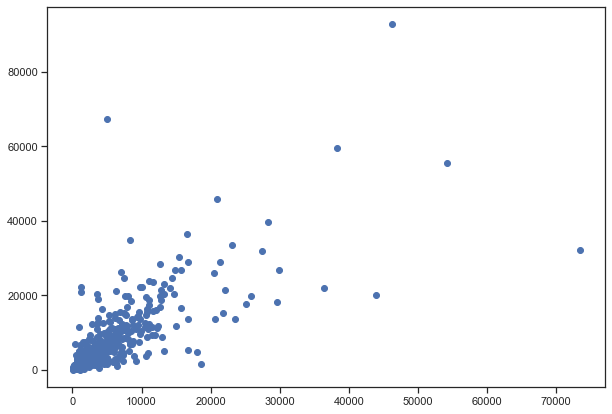

In [15]:
plt.figure(figsize=(10, 7))
plt.scatter(data['Milk'], data['Grocery']) 

In [16]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


# Question 3
Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?
Hint:  Implementation: Feature Scaling and Outlier Detection


In [17]:
# feature scaling
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [18]:
#data_scaled.drop(['Channel', 'Region'],axis=1, inplace=True)

In [19]:
data_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


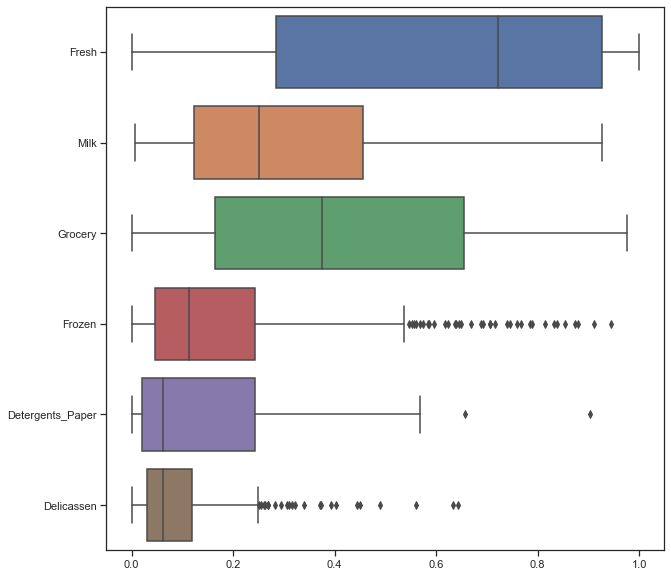

In [20]:
# outlier detection, multivariate outlier analysis using Boxplot
import seaborn as sns
plt.figure(figsize=(10,10))
sns.boxplot(data=data_scaled, orient="h")

Box plot use the IQR method to display data and outliers(shape of the data). The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.

In [21]:
Q1 = data_scaled.quantile(0.25)
Q3 = data_scaled.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Fresh               0.642266
Milk                0.332084
Grocery             0.490151
Frozen              0.198115
Detergents_Paper    0.222361
Delicassen          0.087908
dtype: float64


In [22]:
print(data_scaled < (Q1 - 1.5 * IQR)) |(data_scaled > (Q3 + 1.5 * IQR))

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    False  False    False   False             False       False
1    False  False    False   False             False       False
2    False  False    False   False             False       False
3    False  False    False   False             False       False
4    False  False    False   False             False       False
5    False  False    False   False             False       False
6    False  False    False   False             False       False
7    False  False    False   False             False       False
8    False  False    False   False             False       False
9    False  False    False   False             False       False
10   False  False    False   False             False       False
11   False  False    False   False             False       False
12   False  False    False   False             False       False
13   False  False    False   False             False       False
14   False  False    Fals

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [23]:
# The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [24]:
# data size before removing the outliers
data_scaled.shape

(440, 6)

In [25]:
clean_data = data_scaled[~((data_scaled < (Q1 - 1.5 * IQR)) |(data_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]
clean_data.shape   # size of clean data after removing the outliers

(381, 6)

The above code will remove the outliers from the dataset. So, above code removed around 59 rows from the dataset i.e. outliers have been removed.

In [26]:
440-381

59

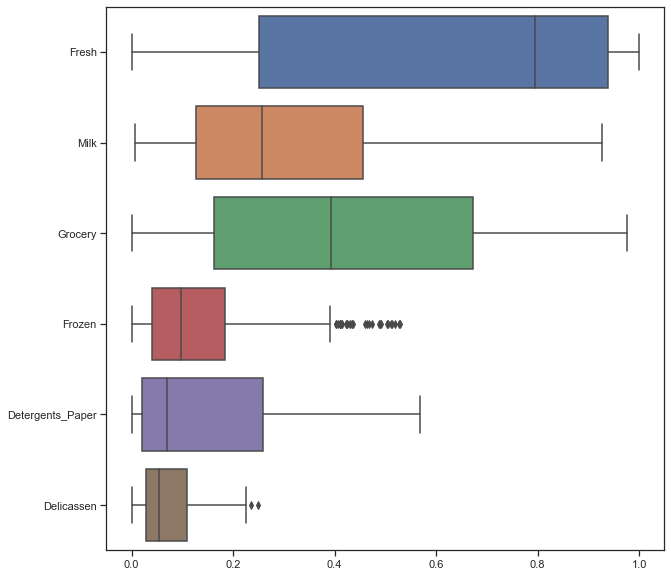

In [27]:
# outlier detection, multivariate outlier analysis using Boxplot
plt.figure(figsize=(10,10))
sns.boxplot(data=clean_data, orient="h")

# Question 4
Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the outliers list to be removed, explain why.
Hint: Feature Transformation and PCA


Before applying PCA, we scale our data such that each feature has same unit variance. This is necessary because fitting algorithms highly depend on the scaling of the features.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(clean_data) # compute the mean and standard which will be used in the next command
X_scaled=scaler.transform(clean_data)# fit and transform can be applied together
# we can check the minimum and maximum of the scaled features which we expect to be 0 and 1
print ("after scaling minimum", X_scaled.min(axis=0))
print ("after scaling maximum", X_scaled.max(axis=0))

after scaling minimum [-1.78301652 -1.3939755  -1.5476696  -1.04750394 -0.96883273 -1.27465763]
after scaling maximum [1.06419532 2.84349487 2.01278166 2.97153899 2.87432321 3.15173565]


In [29]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 
#let's check the shape of X_pca array
print ("shape of X_pca", X_pca.shape)

shape of X_pca (381, 2)


Now we have seen that the data have only 2 features.

# Question 5
How much variance in the data is explained in total by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.
Hint: Implementation: Dimensionality Reduction


In [30]:
# variance ratio of the principal components
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print (ex_variance_ratio)


[0.72145152 0.27854848]


So here we can see that the 2 components contributes to 99% of the total variance.

# Question 5
How much variance in the data is explained in total by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.
Hint: Implementation: Dimensionality Reduction



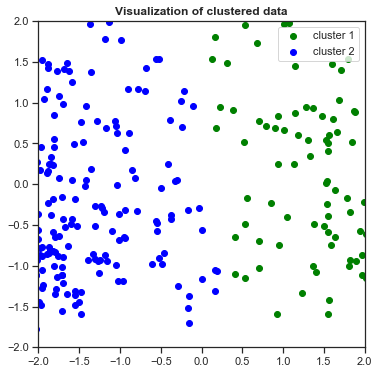

In [31]:
from sklearn.cluster import KMeans, SpectralClustering
km = KMeans(n_clusters=2, max_iter=100)
km.fit(X_pca)
#centroids = km.centroids

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_pca[km.labels_== 0, 0], X_pca[km.labels_== 0, 1],
            c='green',label ='cluster 1')
plt.scatter(X_pca[km.labels_ == 1, 0], X_pca[km.labels_== 1, 1],
            c='blue', label='cluster 2')
#plt.scatter(center[:, 0], center[:, 1], marker='*', s=300,
          #  c='r', label='center')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
#plt.xlabel('  ')
#plt.ylabel('  ')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');